In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('rawPLdataset.csv', sep=';')
X = data.iloc[:, 7:12].values
y = data['Path Loss'].values


<Axes: >

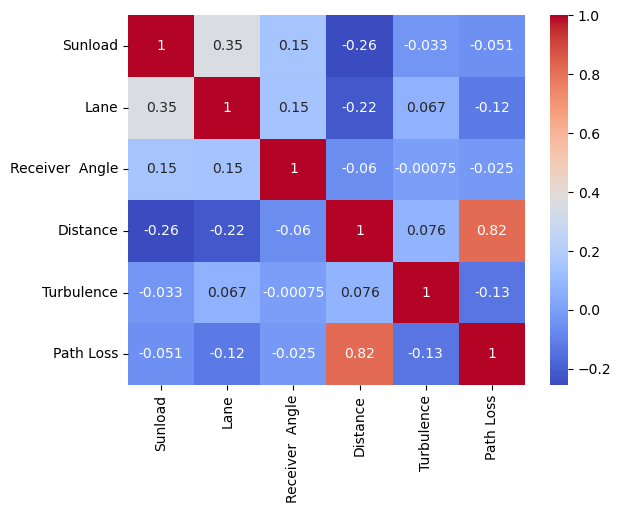

In [13]:
# Correlation analysis

data_corr = data.iloc[:, 7:12]
data_corr['Path Loss'] = data['Path Loss']
correlation_matrix = data_corr.corr()

import seaborn as sns
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

           Sunload         Lane  Receiver  Angle     Distance   Turbulence
count  7686.000000  7686.000000      7686.000000  7686.000000  7686.000000
mean      0.337347     0.992194        13.548009    38.679806     0.470596
std       0.055749     0.703512        14.930530    27.230742     0.499167
min       0.019531     0.000000         0.000000     0.000000     0.000000
25%       0.278320     1.000000         0.000000    13.689404     0.000000
50%       0.361328     1.000000         0.000000    37.524682     0.000000
75%       0.375977     1.000000        30.000000    60.385160     1.000000
max       0.405273     3.000000        30.000000   114.824392     1.000000


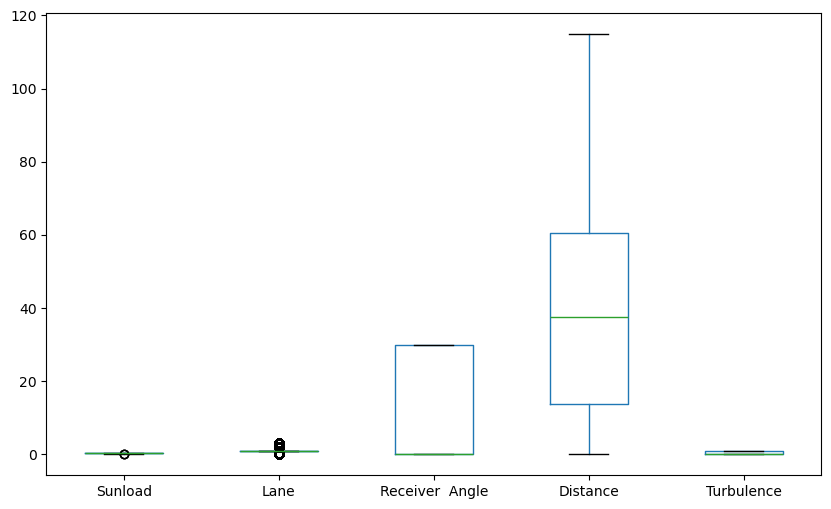

In [3]:
data.iloc[:, 7:12].describe()
print(data.iloc[:, 7:12].describe())

# box plot for each variable
import matplotlib.pyplot as plt
# no grid
plt.figure(figsize=(10, 6))

data.iloc[:, 7:12].boxplot(grid=False)
plt.show()


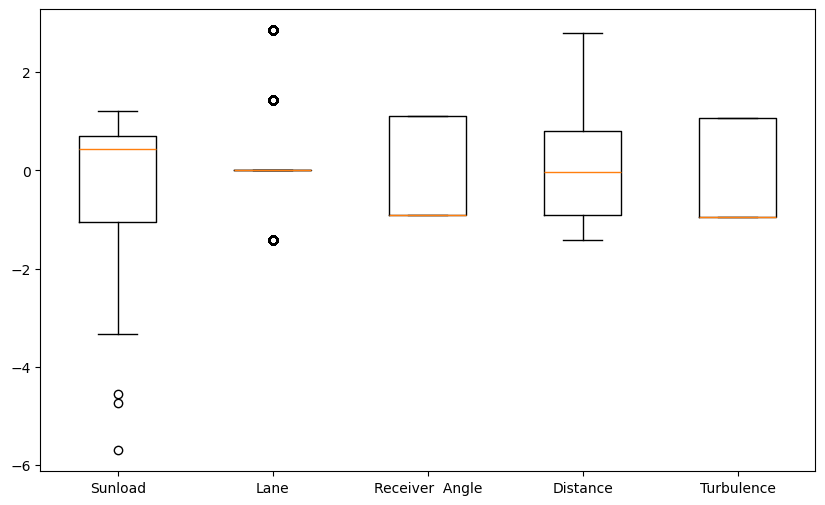

In [4]:
# Box plots after standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.boxplot(X)
plt.xticks([1, 2, 3, 4, 5], data.columns[7:12].values)
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree  import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_test: metrics.mean_absolute_error(y_true, y_test), 
    'MSE': lambda y_true, y_test: metrics.mean_squared_error(y_true, y_test)
}

# Train - Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


def LR(X_train, X_test, y_train):
    lr = LinearRegression()
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    lr.fit(X_train_std, y_train)
    y_predict = lr.predict(X_test_std)
    return y_predict

def DT(X_train, X_test, y_train):
    dt = DecisionTreeRegressor()
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    dt.fit(X_train_std, y_train)
    y_predict = dt.predict(X_test_std)
    return y_predict

def RF(X_train, X_test, y_train):
    rf = DecisionTreeRegressor()
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    rf.fit(X_train_std, y_train)
    y_predict = rf.predict(X_test_std)
    return y_predict

def SVRG(X_train, X_test, y_train):
    svr = SVR()
    
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    svr.fit(X_train_std, y_train)
    y_predict = svr.predict(X_test_std)
    return y_predict

# def MLP(X_train, X_test, y_train):
#     mlp = MLPRegressor(hidden_layer_sizes=(20, 10, 5), max_iter= int(1E5), activation='relu', solver = 'adam')
#     std = StandardScaler()
#     X_train_std = std.fit_transform(X_train, y_train)
#     X_test_std = std.transform(X_test)
#     mlp.fit(X_train_std, y_train)
#     y_predict = mlp.predict(X_test_std)
#     return y_predict



def tuned_MLP(X_train, y_train):
    parameters_MLP = {
    'hidden_layer_sizes':[(256,), (128,), (64,), (32,), (16,), (8,)],
    'activation': ['relu'],
    'solver': ['adam', 'lbfgs', 'sgd'], 
    'learning_rate':['constant', 'adaptive'],
    'batch_size':[16, 32, 64]
    }

    mlp = MLPRegressor(max_iter=2000)
    clf = GridSearchCV(mlp, parameters_MLP)
    clf.fit(X_train, y_train)
    sorted(clf.cv_results_.keys())
    print('Best params are:', clf.best_params_)
    tuned_MLP = MLPRegressor(**clf.best_params_)
    return tuned_MLP

def MLP(X_train, X_test, y_train, tuned_MLP):
    tuned_mlp = tuned_MLP(X_train, y_train)
    std = StandardScaler()
    X_train_std = std.fit_transform(X_train, y_train)
    X_test_std = std.transform(X_test)
    tuned_mlp.fit(X_train_std, y_train)
    y_predict = tuned_mlp.predict(X_test_std)
    return y_predict


In [8]:
# y_predict_LR = LR(X_train, X_test, y_train)
# y_predict_DT = DT(X_train, X_test, y_train)
# y_predict_RF = RF(X_train, X_test, y_train)
# y_predict_SVR = SVRG(X_train, X_test, y_train)
y_predict_MLP = MLP(X_train, X_test, y_train, tuned_MLP)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 6)
# ax.plot(y_predict_LR)
# ax.plot(y_predict_DT)
# ax.plot(y_predict_RF)
# ax.plot(y_predict_SVR)
ax.plot(y_predict_MLP)
ax.plot(y_test)
# ax.legend(['DT', 'RF', 'SVR', 'MLP', 'Test'])

# print('MAE_LR:', mtrc['MAE'](y_test, y_predict_LR))
# print('MAE_DT:', mtrc['MAE'](y_test, y_predict_DT))
# print('MAE_RF:', mtrc['MAE'](y_test, y_predict_RF))
# print('MAE_SVR:', mtrc['MAE'](y_test, y_predict_SVR))
print('MAE_MLP:', mtrc['MAE'](y_test, y_predict_MLP))

/opt/anaconda3/envs/env10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/env10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/env10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converg

In [ ]:
plt.plot(y_test[:100])
plt.plot(y_predict_DT[:100])
plt.legend(['True', 'Predicted'])
plt.savefig('pred.eps')


In [ ]:
#scatter plot


plt.scatter(y_test, y_predict_DT)
p1 = [y_test.min(), y_predict_DT.min()]
p2 = [y_test.max(), y_predict_DT.max()]
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red', linewidth=5)
plt.xlabel('True values', fontsize=20)
plt.ylabel('Predicted values', fontsize=20)
plt.savefig('scatter.pdf')

# Keras

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train, y_train)
X_test_std = std.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train_std.shape[1], )))
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.output_shape

(None, 1)

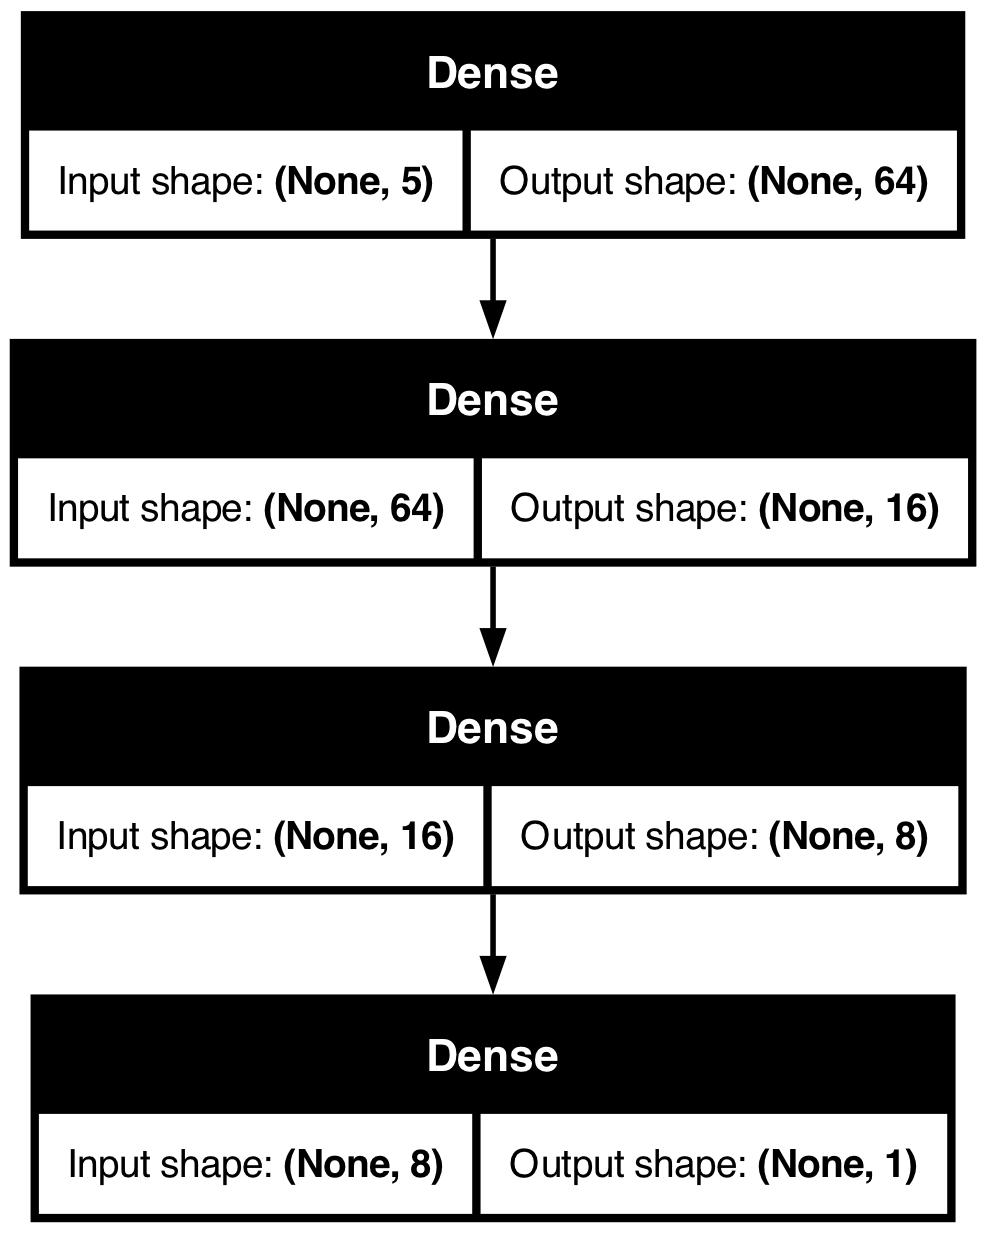

In [7]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
import pandas as pd
df = pd.DataFrame(X_train)
df.describe()

In [ ]:
model.compile(loss='mae',
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train_std, y_train, validation_split = 0.2, epochs=500, batch_size=16)



In [ ]:
y_predict_MLP = model.predict(X_test_std)
print('MAE_MLP:', mtrc['MAE'](y_test, y_predict_MLP))

# TODO
## Feature importance analysis
## To show every metric 

In [ ]:
plt.scatter(y_test, y_predict_RF)
plt.plot([0, 80], [0, 80], 'r')

In [ ]:
np.sqrt(mtrc['MSE'](y_test, y_predict_DT))

# Synthetic data

In [25]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data_correct.csv', sep=',')

X = data.iloc[:, 7:12].values
y_syn = data['PLSyn'].values
y_act = data['PathLoss'].values

In [22]:
X

array([[ 0.36132816,  3.        , 30.        ,  3.23291682,  1.        ],
       [ 0.36132816,  3.        , 30.        ,  3.23291682,  1.        ],
       [ 0.36621097,  3.        , 30.        ,  4.55580277,  1.        ],
       ...,
       [ 0.27343753,  1.        ,  0.        , 90.62957231,  0.        ],
       [ 0.28320315,  1.        ,  0.        , 89.71257819,  0.        ],
       [ 0.27343753,  1.        ,  0.        , 89.71257819,  0.        ]])

In [26]:
X_train, X_test, y_train_syn, y_test_syn = train_test_split(X, y_syn, test_size=0.2, random_state=4)
X_train, X_test, y_train_act, y_test_act = train_test_split(X, y_act, test_size=0.2, random_state=4)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train_std.shape[1], )))
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.output_shape

#training
model.compile(loss='mae',
              optimizer='adam',
              metrics=['mean_absolute_error'])
model.fit(X_train_std, y_train_syn, validation_split=0.2, epochs=500, batch_size=16)



Epoch 1/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 36.1341 - mean_absolute_error: 36.1341 - val_loss: 5.7658 - val_mean_absolute_error: 5.7658
Epoch 2/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 4.9863 - mean_absolute_error: 4.9863 - val_loss: 3.4964 - val_mean_absolute_error: 3.4964
Epoch 3/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 2.9919 - mean_absolute_error: 2.9919 - val_loss: 2.5091 - val_mean_absolute_error: 2.5091
Epoch 4/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 2.3346 - mean_absolute_error: 2.3346 - val_loss: 2.1328 - val_mean_absolute_error: 2.1328
Epoch 5/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 2.0930 - mean_absolute_error: 2.0930 - val_loss: 1.9696 - val_mean_absolute_error: 1.9696
Epoch 6/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9601 - mean_absolute_error: 1.9601 - val_loss: 1.8617 - val_mean_absolute_error: 1.8617
Epoch 7/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 1.7594 - mean_absol

In [34]:
from sklearn import metrics
mtrc = {
    'MAE': lambda y_true, y_test: metrics.mean_absolute_error(y_true, y_test), 
    'MSE': lambda y_true, y_test: metrics.mean_squared_error(y_true, y_test)
}

In [36]:
#prediction
print('Synthetic data')
y_predict_syn = model.predict(X_test_std)
print('MAE_MLP:', mtrc['MAE'](y_test_act, y_predict_syn))
print('MSE_MLP:', mtrc['MSE'](y_test_act, y_predict_syn))
print('RMSE_MLP:', np.sqrt(mtrc['MSE'](y_test_act, y_predict_syn)))


Synthetic data
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
MAE_MLP: 9.055302309783812
MSE_MLP: 133.08214046981814
RMSE_MLP: 11.536123286001157


# With Actual Data


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train_std.shape[1], )))
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.output_shape

#training
model.compile(loss='mae',
              optimizer='adam',
              metrics=['mean_absolute_error'])
model.fit(X_train_std, y_train_act, validation_split=0.2, epochs=500, batch_size=16)



Epoch 1/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 40.1803 - mean_absolute_error: 40.1803 - val_loss: 7.4654 - val_mean_absolute_error: 7.4654
Epoch 2/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 6.9059 - mean_absolute_error: 6.9059 - val_loss: 5.1341 - val_mean_absolute_error: 5.1341
Epoch 3/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 4.8948 - mean_absolute_error: 4.8948 - val_loss: 4.0724 - val_mean_absolute_error: 4.0724
Epoch 4/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 3.7687 - mean_absolute_error: 3.7687 - val_loss: 3.5784 - val_mean_absolute_error: 3.5784
Epoch 5/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 3.3380 - mean_absolute_error: 3.3380 - val_loss: 3.5476 - val_mean_absolute_error: 3.5476
Epoch 6/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 3.0205 - mean_absolute_error: 3.0205 - val_loss: 3.1595 - val_mean_absolute_error: 3.1595
Epoch 7/500
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 2.8625 - mean_abs

In [38]:
print('Actual data')
y_predict_act = model.predict(X_test_std)
print('MAE_MLP:', mtrc['MAE'](y_test_act, y_predict_act))
print('MSE_MLP:', mtrc['MSE'](y_test_act, y_predict_act))
print('RMSE_MLP:', np.sqrt(mtrc['MSE'](y_test_act, y_predict_act)))


Actual data
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
MAE_MLP: 1.8620286324667266
MSE_MLP: 14.846254151078929
RMSE_MLP: 3.8530837197080117
